# *Gender Recognition by Voice*

## 1. Introduction to dataset and loading: 

### 1.1 Source of the Dataset:
   [Source of the Dataset - data.world](https://data.world/ml-research/gender-recognition-by-voice)

### 1.2 Description Of Dataset:

<p style='text-align: justify;'> This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).</p>

### 1.3 Load the Dataset:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#read data file
data = pd.read_csv('voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [2]:
data.shape

(3168, 21)

In [3]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


### 1.4 Data cleaning and preprocessing:
<p style='text-align: justify;'>Data is clean and no preprocessing required. Except for changing the label column which is the target for the dataset which is done later.</p>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

### 1.5 Handling missing Values:

In [5]:
data.isnull().values.any()

False

## 2. Goal and Analysis:

<p style='text-align: justify;'> The objective is to categorize the voice dataset into male and female voice by classifying it. In order to accomplish so, four classifiers — SVM, KNN, Decision Tree, and Random Forest—have been taken into consideration. With the help of these, we have calculated the accuracies of each and have chosen the one with the highest accuracy to calculate further performance indicators.</p>

## 3 Exploratory data analysis:

### 3.1 Visualize dataset:

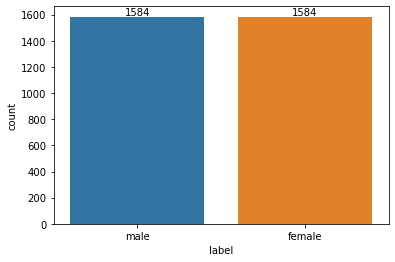

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='label', data=data)
ax.bar_label(ax.containers[0])
plt.show()

### 3.2 Histogram of fields in the dataset:

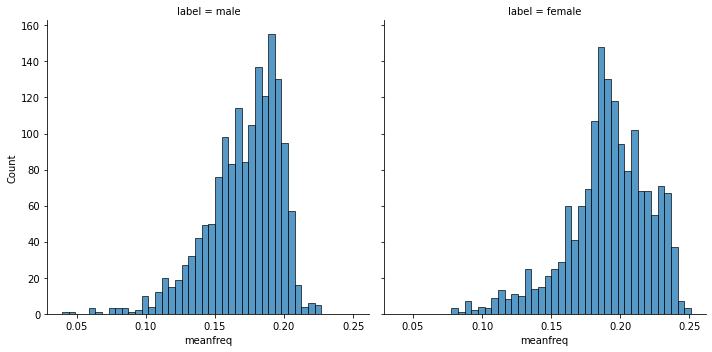

In [7]:
sns.displot(data, x="meanfreq", col="label")
plt.show()

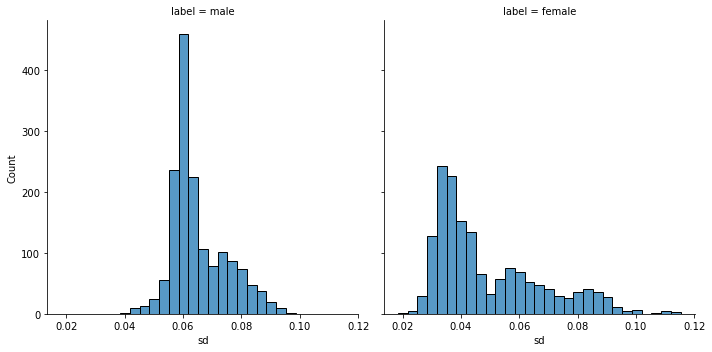

In [8]:
sns.displot(data, x="sd", col="label")
plt.show()

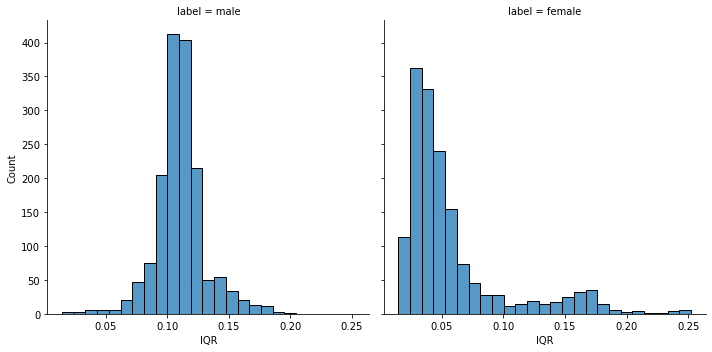

In [9]:
sns.displot(data, x="IQR", col="label")
plt.show()

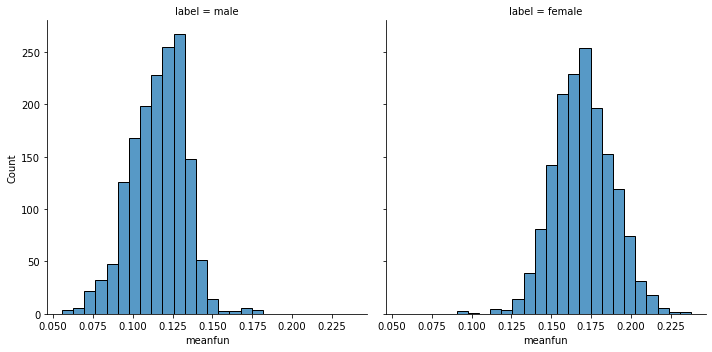

In [10]:
sns.displot(data, x="meanfun", col="label")
plt.show()

### 3.3 Identifying Relationships:

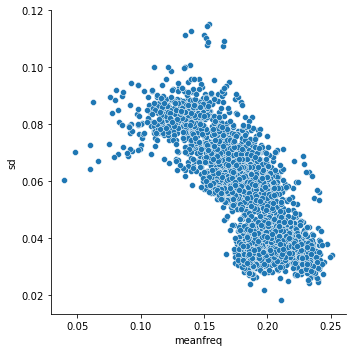

In [11]:
sns.relplot(x ="meanfreq", y ="sd",data = data);

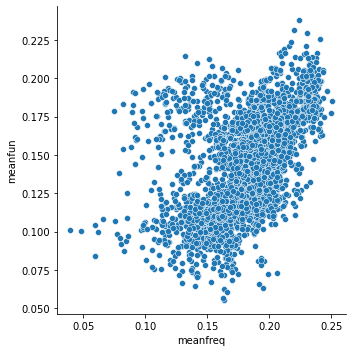

In [12]:
sns.relplot(x ="meanfreq", y ="meanfun",data = data);

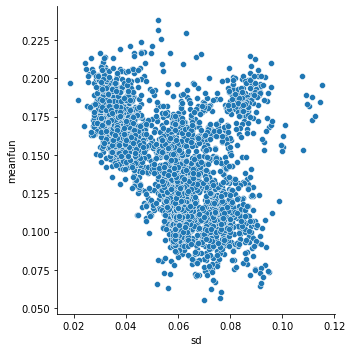

In [13]:
sns.relplot(x ="sd", y ="meanfun",data = data);

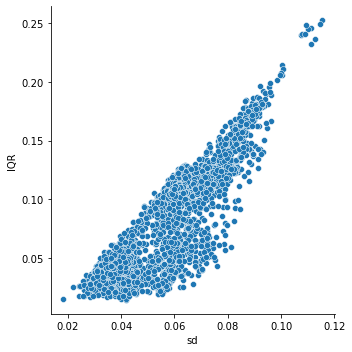

In [14]:
sns.relplot(x ="sd", y ="IQR",data = data);

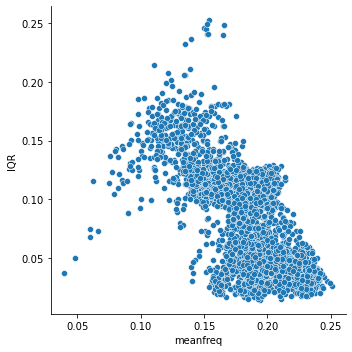

In [15]:
sns.relplot(x ="meanfreq", y ="IQR",data = data);

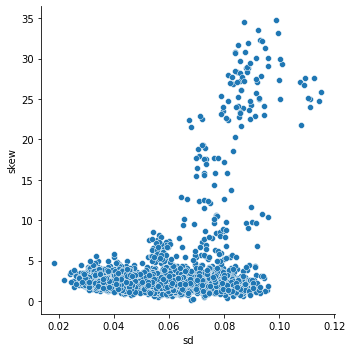

In [16]:
sns.relplot(x ="sd", y ="skew",data = data);

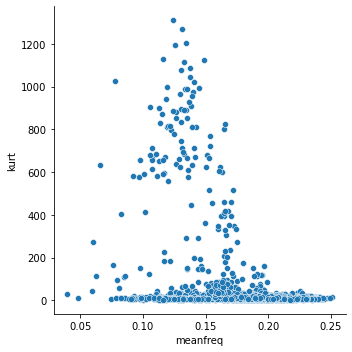

In [17]:
sns.relplot(x ="meanfreq", y ="kurt",data = data);

### 3.4 Correlation analysis:

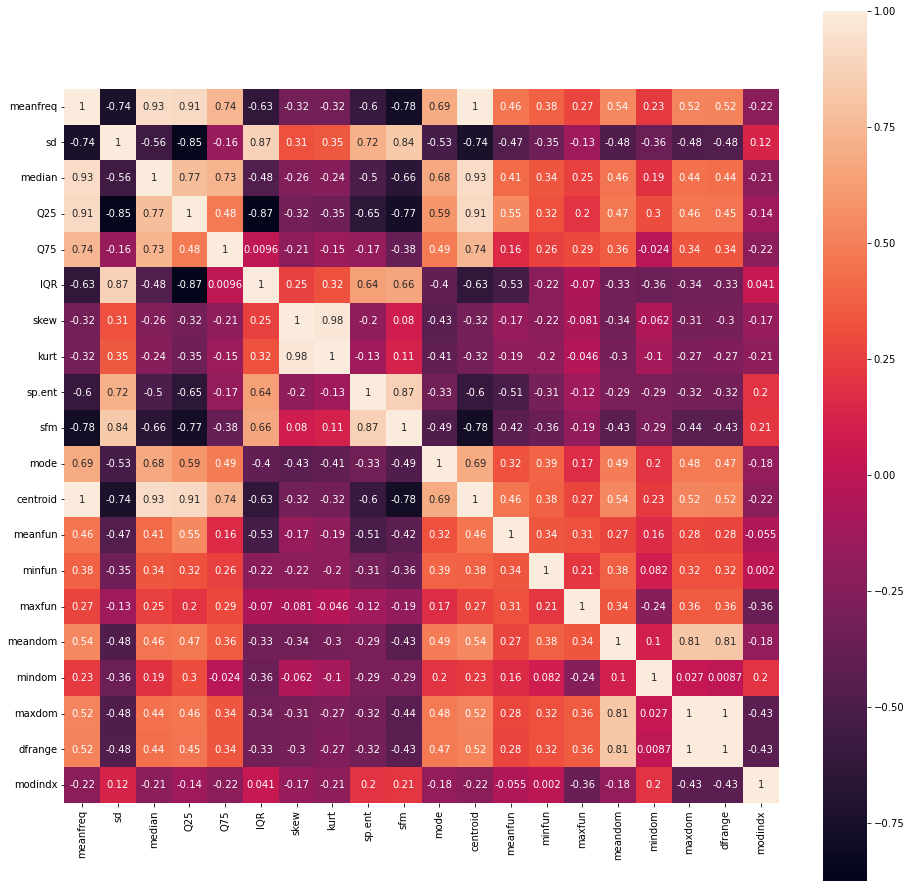

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = data.corr()
f, ax = plt.subplots(figsize = (16,16))
sns.heatmap(correlation, square = True,annot =True)
plt.show()

### 3.5  Variables important in explaining target variable:

In [19]:
correlated_features = set()
for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) > 0.8:
            colname = correlation.columns[i]
            correlated_features.add(colname)

In [20]:
print(correlated_features)

{'Q25', 'IQR', 'median', 'sfm', 'kurt', 'maxdom', 'dfrange', 'centroid'}


<p style='text-align: justify;'>The variables  {'maxdom', 'IQR', 'centroid', 'sfm', 'Q25', 'dfrange', 'kurt', 'median'}  are highly correlated.Hence we can keep one of variables and drop the rest. The variables important are  {'meanfreq','sd','Q75','IQR','skew','sp.ent','mode','meanfun','minfun','maxfun','meandom','mindom','modindx'}</p>

### 3.6 Principal Component Analysis:

In [21]:
dict = {'label':{'male':1,'female':0}}     
data.replace(dict,inplace = True)  
x = data.loc[:, data.columns != 'label']
y = data.loc[:,'label']

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
pca1 = PCA()
pca_X1 = pca1.fit_transform(x_scaled)
explained_variance1 = pca1.explained_variance_ratio_
print("Explained Variacne by all the components:",explained_variance1*100 )

Explained Variacne by all the components: [4.52163908e+01 1.18706090e+01 1.09099393e+01 7.61976317e+00
 5.29393771e+00 4.61496635e+00 3.20448218e+00 2.89839393e+00
 2.45172645e+00 1.87551752e+00 1.65590573e+00 8.95842514e-01
 6.90291504e-01 4.69046383e-01 2.28912851e-01 6.45523808e-02
 3.97221935e-02 1.91782430e-28 2.98931398e-30 1.49715024e-31]


In [23]:
#pca for 2 components
pca2 = PCA(n_components=2)
pca_X2 = pca2.fit_transform(x_scaled)
explained_variance2=pca2.explained_variance_ratio_
print("Explained Variacne by all the components:",explained_variance2*100 )

Explained Variacne by all the components: [45.21639078 11.87060904]


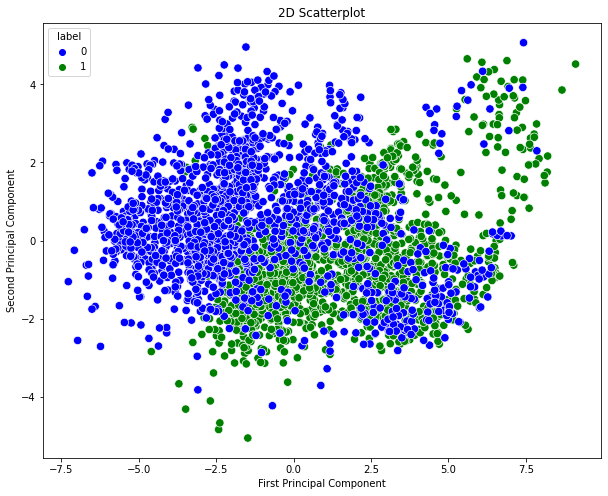

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_X2[:,0], y=pca_X2[:,1],s=70, hue=y, palette=['blue','green'])
plt.title("2D Scatterplot")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

### 3.7 Feature selection:

<p style='text-align: justify;'>From the Correaltion Analysis we found that the column {'median', 'dfrange', 'Q25', 'kurt', 'IQR', 'sfm', 'maxdom', 'centroid'} are highly correlated. The column IQR is more corellated to the target. Hence, dropping the other features {'median', 'dfrange', 'Q25', 'kurt', 'sfm', 'maxdom', 'centroid'} from the data.  </p>

In [25]:
data.corr()['label']

meanfreq   -0.337415
sd          0.479539
median     -0.283919
Q25        -0.511455
Q75         0.066906
IQR         0.618916
skew        0.036627
kurt        0.087195
sp.ent      0.490552
sfm         0.357499
mode       -0.171775
centroid   -0.337415
meanfun    -0.833921
minfun     -0.136692
maxfun     -0.166461
meandom    -0.191067
mindom     -0.194974
maxdom     -0.195657
dfrange    -0.192213
modindx     0.030801
label       1.000000
Name: label, dtype: float64

In [26]:
x.drop(labels={'Q25','dfrange', 'sfm', 'maxdom', 'median', 'kurt', 'centroid'}, axis=1, inplace=True)

## 4. Model building

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

In [28]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (2217, 13)
Training Labels Shape: (2217,)
Testing Features Shape: (951, 13)
Testing Labels Shape: (951,)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

### SVM with default hyperparameter

In [30]:
from sklearn.svm import SVC

svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred1 = svc.predict(X_test)
print("Accuracy of SVC: ",metrics.accuracy_score(y_test,y_pred1))

Accuracy of SVC:  0.750788643533123


### KNeighborsClassifier (KNN) default hyperparameter

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)
print("Accuracy of KNeighbors Classifier: ",metrics.accuracy_score(y_test, y_pred2))

Accuracy of KNeighbors Classifier:  0.8296529968454258


### DecisionTreeClassifier with default hyperparameter

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred3 = dtc.predict(X_test)
print("Accuracy of Decision Tree Classifier: ",metrics.accuracy_score(y_test, y_pred3))

Accuracy of Decision Tree Classifier:  0.9663512092534174


### RandomForestClassifier with default hyperparameter

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,y_train)
y_pred4 = clf.predict(X_test)
print("Accuracy of Random Forest Classifier: ",metrics.accuracy_score(y_test, y_pred4))

Accuracy of Random Forest Classifier:  0.9779179810725552


## 5. Evaluating the results:
By comparing different models we found RandomForestClassifier to be best suited for our dataset. Hence, evaluating results for the RandomForestClassifier model

### Accuracy of Random Forest Classifier:

In [34]:
print("Accuracy of Random Forest Classifier: ",metrics.accuracy_score(y_test, y_pred4))

Accuracy of Random Forest Classifier:  0.9779179810725552


### Mean Squared Error:

In [35]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test,y_pred4)
print("Average Mean Squared Error", mse)

Average Mean Squared Error 0.022082018927444796


### Confusion matrix:

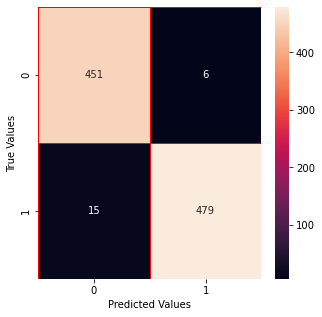

In [36]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

### ROC and AUC:

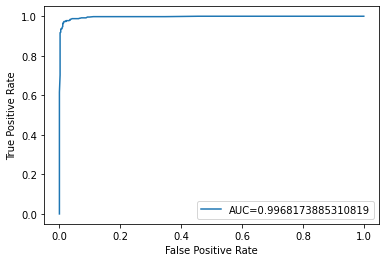

In [37]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## 6. Conculsion:
###  Findings and analysis:
After analyzing different classification methods, we found that Random Forest classifier is better suited for this dataset with the accuracy of 97.79% and MSE of 0.02208.

## 7. What further analysis can be done?
<p style='text-align: justify;'>Here we are categorizing male and female voices, in future we can also analyze the emotions in the voices and age of the individual.We could also try testing the model on a larger and more diverse dataset to see if it improves its accuracy.</p>
<p style='text-align: justify;'>Another approach would be to try to understand why the model makes the mistakes that it does. For example, you could look at examples where the model predicts the wrong gender and try to determine what factors might be causing the errors. This could help you identify areas where the model might be improved. In addition, you could also explore ways to improve the model's performance. This could involve using different machine learning algorithms or techniques, such as fine-tuning the model's parameters or using regularization to prevent overfitting. You could also try incorporating additional features, such as the speaker's age or the context in which the voice was recorded, to see if that improves the model's accuracy.</p>